In [1]:
# Base libraries
from collections import namedtuple
from dataclasses import dataclass
from typing import List, Tuple, Dict, Callable, Any
import numpy as np
import pandas as pd
import random

# ML libraries
import torch

# Local imports
from board import ConnectFourField
from env import Env
from random_agent import RandomAgent
from deep_q_agent import DeepQAgent
import utils

# Fix random seed
utils.seed_everything()

Winner of episode 2000 was player 1. P1 has 1443 wins, P2 has 557 wins, and there were 0 draws.
End state of the last game was:


/Users/oliver/Documents/ETH/Master/3.Semester/Deep Learning/Project/dl2023/env.py:120: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Circle((j + 0.5, i + 0.5), 0.4, color='red', edgecolor='black', linewidth=2))
/Users/oliver/Documents/ETH/Master/3.Semester/Deep Learning/Project/dl2023/env.py:117: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Circle((j + 0.5, i + 0.5), 0.4, color='yellow', edgecolor='black', linewidth=2))


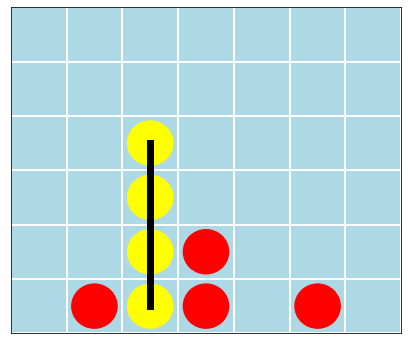

Results of evaluation were: P1 has 79 wins, P2 has 21 wins, and there were 0 draws.
End state of the last game was:


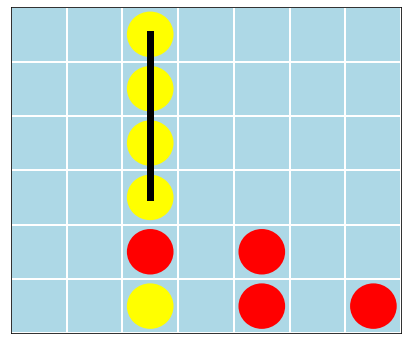

In [2]:
#Initialize Environment and Agent
env = Env()
agent = DeepQAgent(env)

AGENT = 1
OPPONENT = 2
NUM_EPISODES = {'train': 2000, 'eval': 100}
VERBOSE = True
MODES = ['train', 'eval']

if VERBOSE: env.render_console()

#Initialize Opponent Agent (This Agent is NOT trained)
opponent = RandomAgent(env)

for mode in MODES:
    # Reset score counter
    p1_score = 0
    p2_score = 0

    for i in range(1, NUM_EPISODES[mode] + 1):
        # Initialize other variables
        finished = -1
        #Print every x-th episode to know the progess..
        if (i % 50 == 0):
            print(f"Currently at Episode {i}.")

        # Make it random who gets to start the game
        # Set to true during the episode
        agent_start = random.choice([True, False])
        # Run one episode of the game
        while finished == -1:
            if finished != -1: break
            # Agent makes a turn
            if agent_start:
                state = env.get_state()
                action = agent.act(state)
                if VERBOSE: print(f"Agents Action: {action}")
                valid, reward, finished = agent.env.step(action, AGENT)
                if VERBOSE: env.render_console()

                # TODO: Here all the code for storing sequences in the buffer and learning/training the network would be!
                if type(agent) is not RandomAgent and mode == 'train':
                    agent.remember(state, action, reward, env.get_state(), finished)
                    agent.optimize_model()
                if finished != -1: break
            else:
                agent_start = True

            # If move was invalid, repeat TODO: cumulate negative reward in this case!
            '''
            TODO: How to handle this whole "invalid move" situation in general,
            1) Should we adapt the actionspace to only the valid actions? (hard..)
            2) Punish the Agent for making a invalid move, but how to we represent that in the sequence?
            -> Easiest way would probably just be to give negative reward and make the agent "skip their move",
            i.e. they are not allowed to play a move (this punishes them aswell as they will more likely lose!)

            Here I follow the approach that the Agent is NOT able to repeat the move if it was invalid!
            TODO: In that case, the "valid" variable is unnecessary
            '''

            # Opponent makes their turn
            action = opponent.act()
            if VERBOSE: print(f"Opponents Action: {action}")
            valid, reward, finished = opponent.env.step(action, OPPONENT)
            if VERBOSE: env.render_console()
            if finished != -1: break

        episode_str = f'Winner of episode {i} was player {finished}.'
        if finished == 1:
            p1_score += 1
        elif finished == 2:
            p2_score += 1
        else:
            episode_str = f'Episode {i} ended in a draw.'

        if VERBOSE or i == NUM_EPISODES[mode]:
            if mode == 'eval': episode_str = 'Results of evaluation were:'
            print(episode_str + f' P1 has {p1_score} wins, P2 has {p2_score} wins, and there were {i - p1_score - p2_score} draws.')
            print('End state of the last game was:')
            env.render_pretty()

        env.reset()
    







